![](http://)# Paris Housing Classification


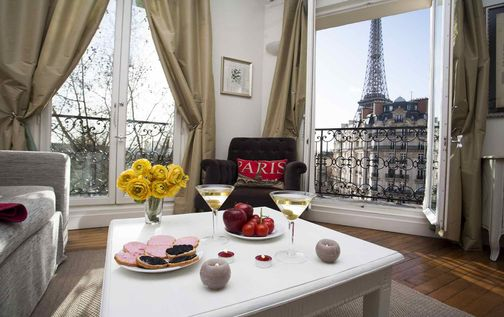

# Table of content: 
* About Data
* Import Laibries and Data
* Exploratory Data Analysis
* Split
* Scaling 
* Modeling
* Conclusion

# About data: 
This is a set of data created from imaginary data of house prices in an urban environment - Paris.

## Features: 
All attributes are numeric variables and they are listed bellow:

1. squareMeters
2. numberOfRooms
3. hasYard
4. hasPool
5. floors - number of floors
6. cityCode - zip code
7. cityPartRange - the higher the range, the more exclusive the neighbourhood is
8. numPrevOwners - number of prevoious owners
9. made - year
10. isNewBuilt
11. hasStormProtector
12. basement - basement square meters
13. attic - attic square meteres
14. garage - garage size
15. hasStorageRoom
16. hasGuestRoom - number of guest rooms
17. price - price of a house
18. category - Luxury or Basic (Target feature) 

# Import Libraries and Data

In [351]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
data=pd.read_csv("../input/paris-housing-classification/ParisHousingClass.csv")
data

In [352]:
data.info()

In [353]:
data.isnull().sum()

# EDA

In [354]:
data.describe()

In [355]:
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3)
ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(x='category', data=data, ax=ax1, palette='spring_r')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')

In [356]:
data['category'].value_counts()

**The number of Basic houses more than the luxury **

In [357]:
fig = plt.figure(figsize=(16, 5))
gs = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(gs[0, 1])
sns.countplot(x='hasYard', data=data, ax=ax1, palette='spring_r')
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
ax1.set_xlabel('')
ax1.set_ylabel('')
data.replace((0))

**Houses have yard is more than the houses have not **

In [358]:
pd.crosstab(data['category'], data['hasYard'], margins=True).style.background_gradient(cmap="YlGnBu")

In [359]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasYard', data=data, hue='category',  palette='YlGnBu')

the table show the number of basic and luxury that have yard 
& all the luxury houses have yard

In [360]:
data['hasPool'].value_counts(normalize = True).plot.pie(autopct = '%.2f%%')

In [361]:
pd.crosstab(data['category'], data['hasPool'], margins=True).style.background_gradient(cmap="YlGnBu")

In [362]:
plt.figure(figsize=(12,8))
sns.countplot(x='hasPool', data=data, hue='category',  palette='rocket')

houses have Pool is more than the houses have not 

the table show the number of basic and luxury that have Pool

In [363]:
plt.figure(figsize=(15,10))
sns.countplot(x='cityPartRange', data=data, hue='category',  palette='ch:s=-.2,r=.6')

In [364]:
pd.crosstab(data['category'], data['cityPartRange'], margins=True).style.background_gradient(cmap="YlGnBu")

the the table show the number of houses in each part of city

In [365]:
plt.figure(figsize=(15,10))
sns.countplot(x='numPrevOwners', data=data, hue='category',  palette='cubehelix')

In [366]:
pd.crosstab(data['category'], data['numPrevOwners'], margins=True).style.background_gradient(cmap="YlGnBu")

In [367]:
pd.crosstab(data['category'], data['isNewBuilt'], margins=True).style.background_gradient(cmap="YlGnBu")

In [368]:
plt.figure(figsize=(12,8))
sns.countplot(x='isNewBuilt', data=data, hue='category',  palette='mako')

In [369]:
pd.crosstab(data['category'], data['hasStormProtector'], margins=True).style.background_gradient(cmap="YlGnBu")

In [370]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasStormProtector', data=data, hue='category',  palette='YlOrBr')

In [371]:
pd.crosstab(data['category'], data['hasStorageRoom'], margins=True).style.background_gradient(cmap="YlGnBu")

In [372]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasStorageRoom', data=data, hue='category',  palette='flare')

In [373]:
pd.crosstab(data['category'], data['hasGuestRoom'],margins=True).style.background_gradient(cmap="YlGnBu")

In [374]:
plt.figure(figsize=(15,10))
sns.countplot(x='hasGuestRoom', data=data, hue='category',  palette='light:b')

In [375]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr() , annot = True,cmap="YlGnBu")

**Price and square meter depend on each other **

In [376]:
plt.figure(figsize=(16, 12))
sns.distplot(data.squareMeters, bins = 45, color = '#f88f01', hist = True)
plt.xlabel(' Price of Houses in a block in $', fontsize=16)
plt.ylabel('square meter', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=20)
plt.show()

In [377]:
data.hist(bins = 50, figsize = (20,20))
plt.show()

In [378]:
plt.figure(figsize=(12,6))
plt.plot(data['squareMeters'], data['price'])

**Relation between squaremeters and price is directly (1 m^2 = 100$)**

In [379]:
plt.figure(figsize=(12,6))
sns.stripplot(x='category', y='price', data=data,
              jitter=True, hue='isNewBuilt', dodge=True)

**We note that no old houses in luxury category** 

In [380]:
data.plot(kind = "box" , subplots = True , figsize = (18,18), layout = (7,5))


**No outliers in data**

In [381]:
pd.crosstab(data['category'], data['hasStormProtector'],margins=True).style.background_gradient(cmap="YlGnBu")

**It's not a unique feature to decide the house is luxury or basic.**

In [382]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['category'],y=data['hasStormProtector'],palette='cubehelix')
plt.xticks(rotation='vertical')
plt.show()


**Both of catogries has StormProtector**

In [383]:
data['made'].value_counts().unique

In [384]:
plt.figure(figsize=(20,16))
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 9)
sns.countplot(data['made'])
plt.xticks(rotation=90)
plt.show()

After to get insght from data we need more understand to answer some questions: 

**What the Luxury and Basic brice ranges?**

In [385]:
plt.figure(figsize=(16,12))
sns.boxenplot(x="price", data=data[data['category'] == 'Luxury'], palette="plasma")

In [386]:
plt.figure(figsize=(16,12))
sns.boxenplot(x="price", data=data[data['category'] == 'Basic'], palette="viridis")

We note that the distribution of brice for both categories are the same, but this not make sense, this may be due to the fact that these are only fictitious data and not realistic

**What are the factors that distinguish luxury homes from others?**

From previous visulization we note that the luxury house always have a yard and pool, also it always a new built.

# Preprocessing

In [387]:
data.isnull().sum()

No nulls in data

In [388]:
len(data)-len(data.drop_duplicates())

No duplication

Label encoder using sklearn for target feature

In [389]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['category'] = label.fit_transform(data['category'])

In [390]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 14))
    ax = sns.heatmap(data.corr(), mask=mask, vmax=.5, square=True,annot = True, cmap="YlGnBu")

Due to high correlation btween peice and squareMeters, we will drop one of them.

In [391]:
data.drop("price" , axis = 1, inplace = True)

# Split data

In [392]:
x = data.drop("category" , axis = 1).values
y = data['category'].values

In [393]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.20 , random_state=42)

# Scaling 

In [394]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [395]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Modeling

In [396]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report, roc_curve

## 1. Decision Tree

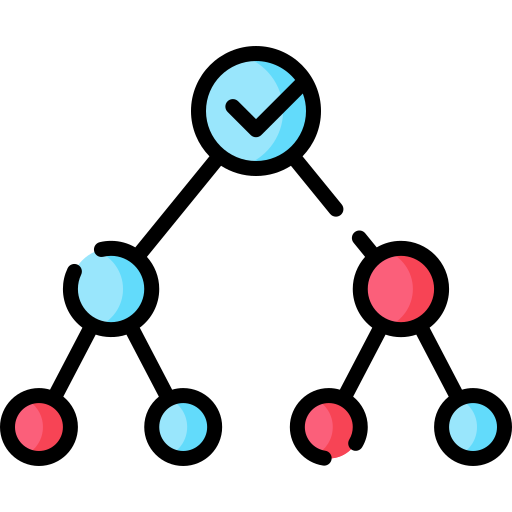

In [397]:
from sklearn.tree import DecisionTreeClassifier

In [398]:
dt = DecisionTreeClassifier(criterion= 'gini',max_depth=11 , random_state=42)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)

print('Accuracy_Score of Decision Tree: ', accuracy_score(y_test, dt_pred))
matrix=confusion_matrix(y_test, dt_pred)

In [399]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix , annot = True, cmap="YlOrBr")

### Visualizing the Decision tree:

In [400]:
feature_names = ['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','made','isNewBuilt','hasStormProtector','basement','attic','garage','hasStorageRoom','hasGuestRoom']

In [401]:
class_names = ['Basic','Luxury']

In [402]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,5), dpi=300)
tree.plot_tree(dt,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
fig.savefig('tree.png')

-----------------------------------------------------

## 2. KNeighborsClassifier

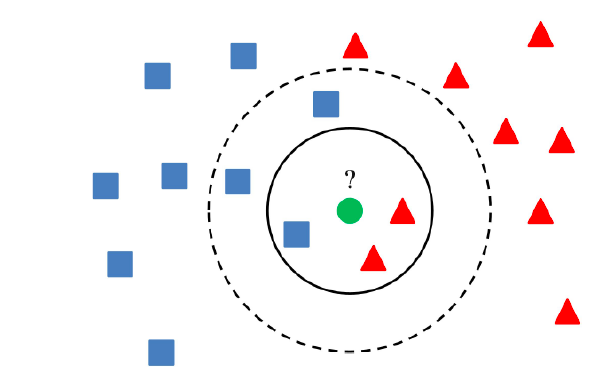

In [403]:
from sklearn.neighbors import KNeighborsClassifier 

In [404]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)

print('Accuracy_Score of KNeighbors Classifier: ', accuracy_score(y_test, knn_pred))
matrix1=confusion_matrix(y_test, knn_pred)

In [405]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix1 , annot = True, cmap="Blues")

**Remark the best number of neighbors to get best accuracy in knn model.**

In [406]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(2, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier (n_neighbors = k)
    # Fit the classifier to the training data
    knn.fit(X_train_scaled,y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)
# Generate plot
plt.figure(figsize=(8,4))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

-----------------------------------------------------------

## Logistic Regression

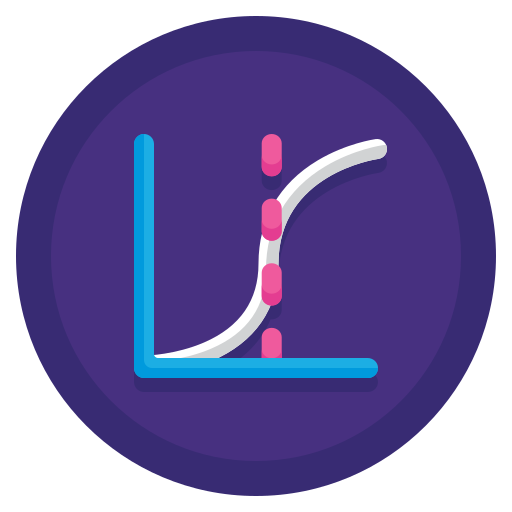

In [407]:
from sklearn.linear_model import LogisticRegression

In [408]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)

print('Accuracy Score of Logistic Regression: ', accuracy_score(y_test, logreg_pred))
matrix2=confusion_matrix(y_test, logreg_pred)

In [409]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix2 , annot = True, cmap="rocket")

---------------------------------------------------------------------

## SVM

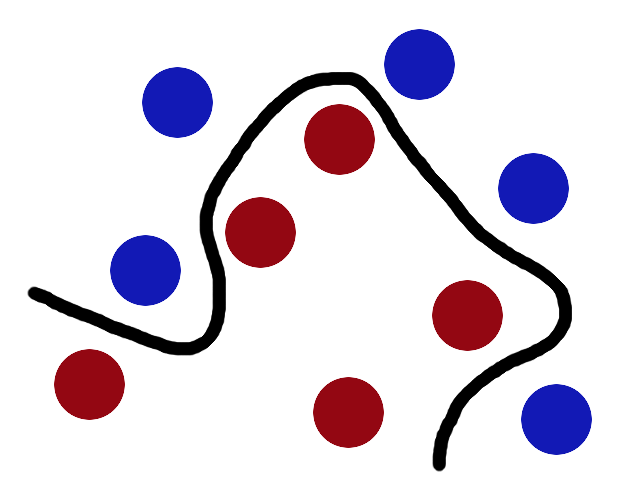

In [410]:
from sklearn.svm import SVC

In [411]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print('Accuracy Score of Super Vector Machine: ', accuracy_score(y_test, svm_pred))
matrix3=confusion_matrix(y_test, svm_pred)

In [412]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix3 , annot = True, cmap="YlGnBu")

## Random Forest Classifier

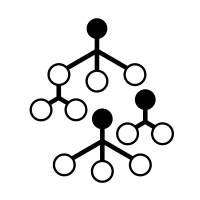

In [413]:
from sklearn.ensemble import RandomForestClassifier

In [414]:
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
RF_pred = RF.predict(X_test_scaled)

print('Accuracy Score of Random Forest Classifier: ', accuracy_score(y_test, RF_pred))
matrix4=confusion_matrix(y_test, RF_pred)

In [415]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix4 , annot = True, cmap="magma")

In [416]:
print(classification_report(y_test, RF_pred))

## xgboost Classifier

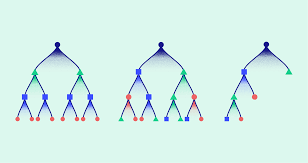

In [417]:
from xgboost import XGBClassifier

In [418]:
XG = XGBClassifier()
XG.fit(X_train_scaled, y_train)
xg_pred = XG.predict(X_test_scaled)

print('Accuracy Score of XGBClassifier: ', accuracy_score(y_test, xg_pred))
matrix5=confusion_matrix(y_test, xg_pred)

In [419]:
plt.figure(figsize = (8,4))
sns.heatmap(matrix5 , annot = True, cmap="Blues")

In [420]:
dt_f1 = f1_score(y_test, dt_pred)
knn_f1 = f1_score(y_test, knn_pred)
svm_f1 = f1_score(y_test, svm_pred)
RF_f1 = f1_score(y_test, RF_pred)
logreg_f1 = f1_score(y_test, logreg_pred)


x=['Decision Tree','KNN','Random Forest','SVM','Logistic Regression']
y=[dt_f1,knn_f1,RF_f1,svm_f1,logreg_f1]

plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
ax.bar(x, y, linewidth=2)
plt.title('F1 Score Of Our Model')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()


Remark the ROC curve

In [421]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
y_pred_prob_rf = RF.predict_proba(X_test)[:,1]
y_pred_prob_logreg = logreg.predict_proba(X_test)[:,1]

pred_prob = [y_pred_prob_dt,y_pred_prob_knn,y_pred_prob_rf,y_pred_prob_logreg]

# Generate ROC curve values: fpr, tpr, thresholds

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_prob_dt)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_prob_knn)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, y_pred_prob_rf)
fpr_4, tpr_4, thresholds_4= roc_curve(y_test, y_pred_prob_logreg)

# Plot ROC curve
plt.figure(figsize=(16,16))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label = 'Tree decision')
plt.plot(fpr_2, tpr_2, label = 'KNN')
plt.plot(fpr_3, tpr_3, label = 'Random forest')
plt.plot(fpr_4, tpr_4, label = 'Logistic Regresion')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(prop={'size':18}, loc='lower right')

plt.show()
fig.savefig('multiple_roc_curve.png')


So, from ROC - curve we note that the best models are the Tree decision and Random forest.

### Top features

In [422]:
features_relevancy = pd.DataFrame({'feature': data.drop("category" , axis = 1).columns,'coef': np.abs(logreg.coef_[0])})

print("Top features")

features_relevancy.sort_values(by='coef', ascending=False).head(3).style.background_gradient(cmap="YlGnBu")

### Down features

In [423]:
features_relevancy.sort_values(by='coef').head(3).style.background_gradient(cmap="YlGnBu")

# Conclusion: 

* From the data and model result the luxury house must be a new and have a yard and pool.
* We note that the distribution for both categories are the same in most features, but this not make sense, this may be due to the fact that these are only fictitious data and not realistic